In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filepath = '/Users/rahulchangrani/Downloads/titanic.csv'
titanic = pd.read_csv(filepath)
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
def age_group(Age):
    if Age<2:
        return 'infant'
    elif Age<18:
        return 'kid'
    elif Age<60:
        return 'Adult'
    else:
        return 'Senior'
titanic['Age_group']=titanic['Age'].map(age_group)
agebysurv = titanic.pivot_table(index=['Age_group','Survived'],values='Sex',aggfunc='count')
print(agebysurv)

                    Sex
Age_group Survived     
Adult     0         353
          1         222
Senior    0         144
          1          59
infant    0           2
          1          12
kid       0          50
          1          49


In [16]:
agesurv = titanic.groupby(['Age_group','Survived'])['Survived'].count()
print(agesurv)

Age_group  Survived
Adult      0           353
           1           222
Senior     0           144
           1            59
infant     0             2
           1            12
kid        0            50
           1            49
Name: Survived, dtype: int64


Sex     Survived
female  0            9.090909
        1           26.150393
male    0           52.525253
        1           12.233446
Name: Survived, dtype: float64


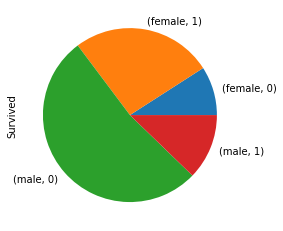

In [162]:
gensurv = titanic.groupby(['Sex','Survived'])['Survived'].count()/8.91
print(gensurv)
gensurv.plot(kind='pie')
plt.show()

In [23]:
fare_grp = pd.qcut(titanic['Fare'],q=10,labels=[1,2,3,4,5,6,7,8,9,10])
titanic['Fare_group']=pd.qcut(titanic['Fare'],q=10,labels=[1,2,3,4,5,6,7,8,9,10])


In [28]:
titanic['Fare_range']=pd.qcut(titanic['Fare'],q=10)
# print(titanic.head())


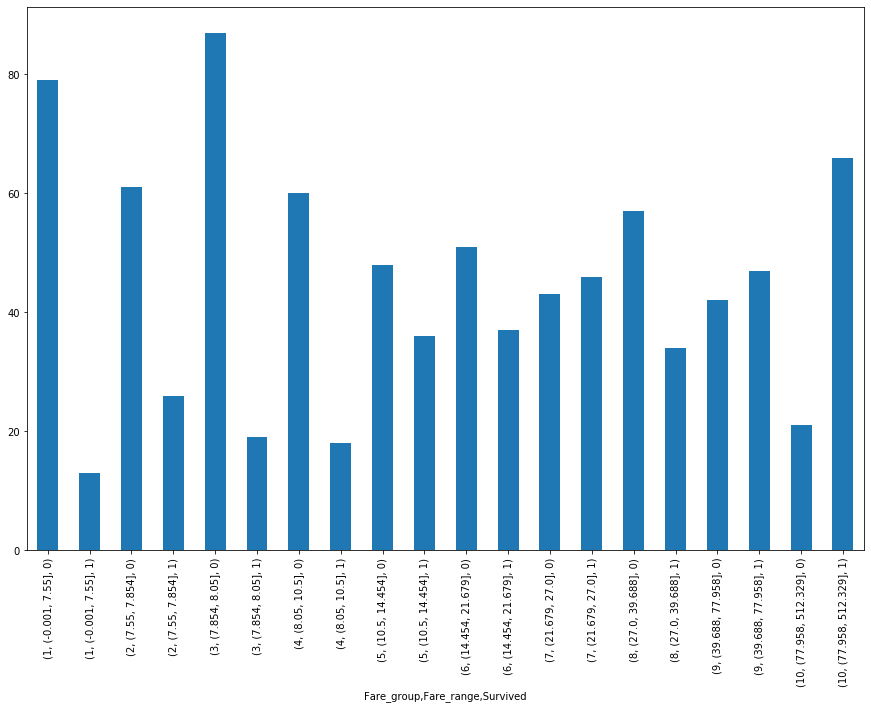

In [153]:
faresurv = titanic.groupby(['Fare_group','Fare_range','Survived'])['Survived'].count()
# print(faresurv)
faresurv.plot(kind='bar',figsize=(15,10))
plt.show()

Age_group  Sex     Survived
Adult      female  0            47
                   1           155
           male    0           306
                   1            67
Senior     female  0            17
                   1            40
           male    0           127
                   1            19
infant     female  1             4
           male    0             2
                   1             8
kid        female  0            17
                   1            34
           male    0            33
                   1            15
Name: Sex, dtype: int64


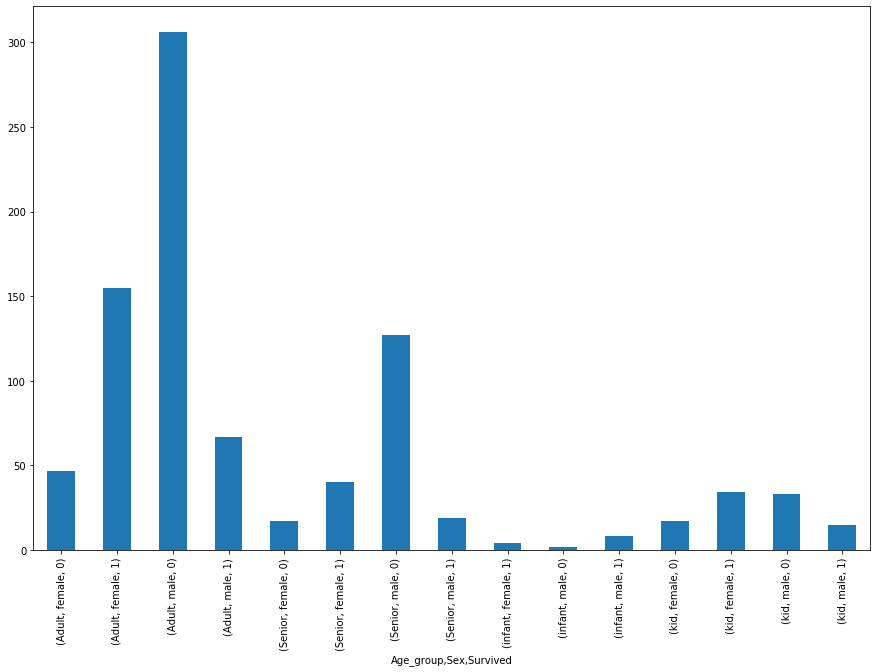

In [82]:
agegensurv = titanic.groupby(['Age_group','Sex','Survived'])['Sex'].count()
print(agegensurv)
agegensurv.plot(kind='bar',stacked=True,figsize=(15,10))

In [46]:
totsurv = titanic.groupby(['Survived']).count()
# titanic['Cabin'].value_counts()
print(totsurv)

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived                                                                    
0                 549     549   549  549  424    549    549     549   549   
1                 342     342   342  342  290    342    342     342   342   

          Cabin  Embarked  Age_group  Fare_group  Fare_range  
Survived                                                      
0            68       549        549         549         549  
1           136       340        342         342         342  


In [94]:
titanic['Cabin'].fillna("No Cabin",inplace=True)


In [99]:
print(titanic.head())
def cabin_use(Cabin):
    if Cabin == 'No Cabin':
        return 'No Cabin'
    else:
        return 'Cbin'
titanic['Cabin']=titanic['Cabin'].map(cabin_use)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare     Cabin Embarked Age_group Fare_group  \
0      0         A/5 21171   7.2500  No Cabin        S     Adult          1   
1      0          PC 17599  71.2833      Cbin        C     Adult          9   
2      0  STON/O2. 3101282   7.9250  No Cabin        S     Adult          3   
3   

Survived  Cabin   
0         Cbin         68
          No Cabin    481
1         Cbin        136
          No Cabin    206
Name: Cabin, dtype: int64


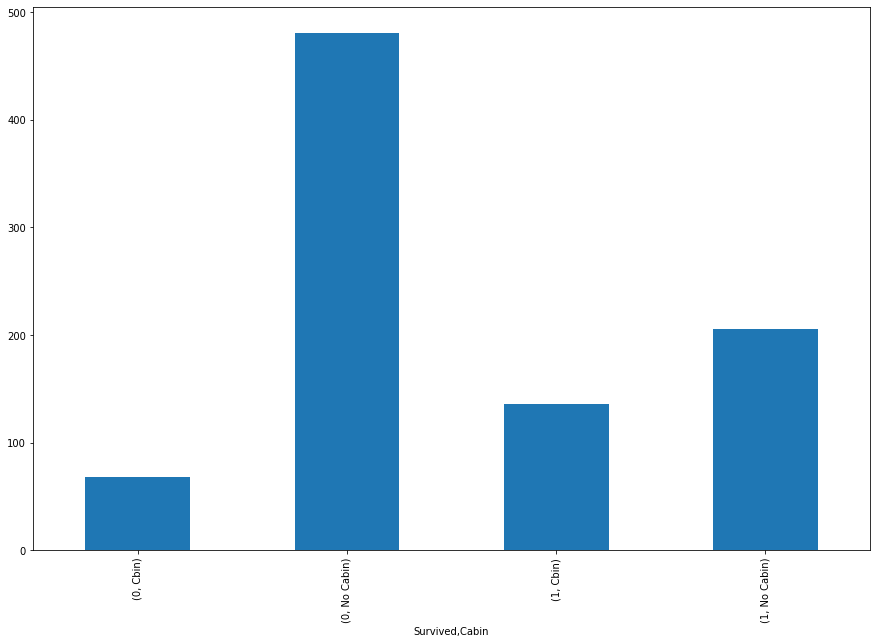

In [155]:
cabinsurv = titanic.groupby(['Survived','Cabin'])['Cabin'].count()
print(cabinsurv)
cabinsurv.plot(kind='bar',stacked=True,figsize=(15,10))
plt.show()
# c = titanic['Cabin'].isnull().sum()
# print(c)
# test = titanic.groupby(titanic['Age_group'] == 'kid')['Sex'].count()
# print(test)

In [84]:
pclasssurv = titanic.groupby(['Pclass','Survived'])['Survived'].count()
print(pclasssurv)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


In [54]:
totmem = titanic.apply(lambda x: x['Parch']+x['SibSp'],axis=1)
# print(totmem)
titanic['Family Members'] = totmem

In [58]:
famsurv = titanic.groupby(['Family Members','Survived'])['Survived'].count()
print(famsurv)

Family Members  Survived
0               0           374
                1           163
1               0            72
                1            89
2               0            43
                1            59
3               0             8
                1            21
4               0            12
                1             3
5               0            19
                1             3
6               0             8
                1             4
7               0             6
10              0             7
Name: Survived, dtype: int64


In [112]:
embksurv = titanic.groupby(['Embarked','Survived'])['Survived'].count()
print(embksurv)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64


In [114]:
def age_range(Age):
    if Age<2:
        return '0 - 1'
    elif Age<18:
        return '2 - 17'
    elif Age<60:
        return '18 - 59'
    else:
        return '60+'
titanic['Age_Range']=titanic['Age'].map(age_range)

In [117]:
age_range_surv = titanic.groupby(['Age_group','Age_Range','Survived'])['Survived'].count()
print(age_range_surv)

Age_group  Age_Range  Survived
Adult      18 - 59    0           353
                      1           222
Senior     60+        0           144
                      1            59
infant     0 - 1      0             2
                      1            12
kid        2 - 17     0            50
                      1            49
Name: Survived, dtype: int64


In [118]:
fare_range_surv = titanic.groupby(['Fare_range','Survived'])['Survived'].count()
print(fare_range_surv)

Fare_range         Survived
(-0.001, 7.55]     0           79
                   1           13
(7.55, 7.854]      0           61
                   1           26
(7.854, 8.05]      0           87
                   1           19
(8.05, 10.5]       0           60
                   1           18
(10.5, 14.454]     0           48
                   1           36
(14.454, 21.679]   0           51
                   1           37
(21.679, 27.0]     0           43
                   1           46
(27.0, 39.688]     0           57
                   1           34
(39.688, 77.958]   0           42
                   1           47
(77.958, 512.329]  0           21
                   1           66
Name: Survived, dtype: int64


In [119]:
fare_age_gen_range_surv = titanic.groupby(['Fare_range','Age_Range','Sex','Survived'])['Survived'].count()
print(fare_age_gen_range_surv)

Fare_range         Age_Range  Sex     Survived
(-0.001, 7.55]     18 - 59    female  0            1
                                      1            3
                              male    0           46
                                      1            5
                   2 - 17     female  1            2
                              male    0            4
                   60+        female  0            1
                                      1            2
                              male    0           27
                                      1            1
(7.55, 7.854]      18 - 59    female  0            6
                                      1            6
                              male    0           31
                                      1            5
                   2 - 17     female  0            1
                                      1            2
                              male    0            1
                   60+        female  0            3

In [142]:
def title_name(n):
    temp = n.split(',')[1]
    title = temp.split('.')[0]
    return title
titanic['Title'] = titanic['Name'].map(title_name)

In [143]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare     Cabin Embarked Age_group Fare_group  \
0      0         A/5 21171   7.2500  No Cabin        S     Adult          1   
1      0          PC 17599  71.2833      Cbin        C     Adult          9   
2      0  STON/O2. 3101282   7.9250  No Cabin        S     Adult          3   
3   

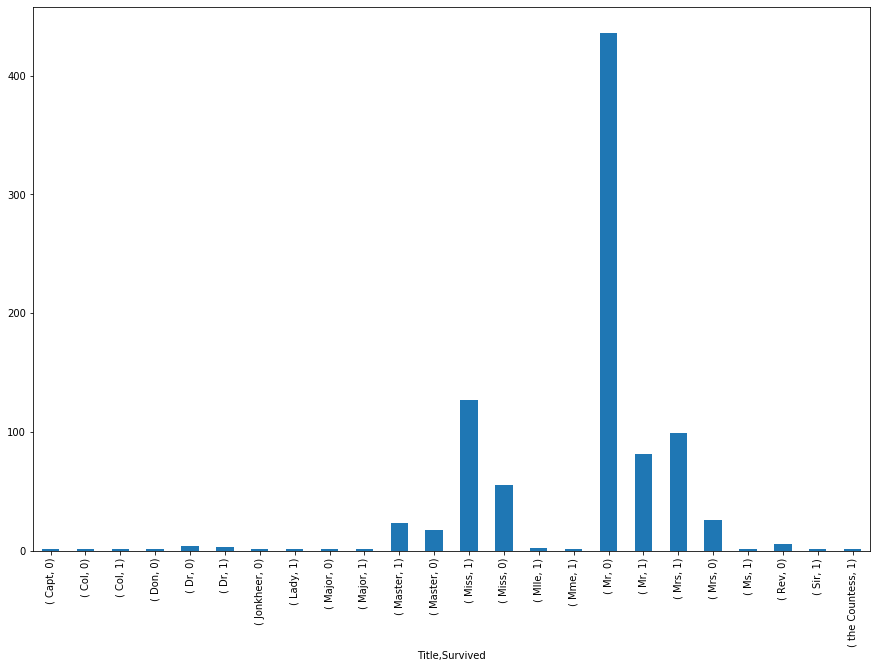

In [156]:
titlesurv = titanic.groupby(['Title'])['Survived'].value_counts()
# print(titlesurv)
titlesurv.plot(kind='bar',figsize=(15,10))
# plt.show()